In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Connect to the database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

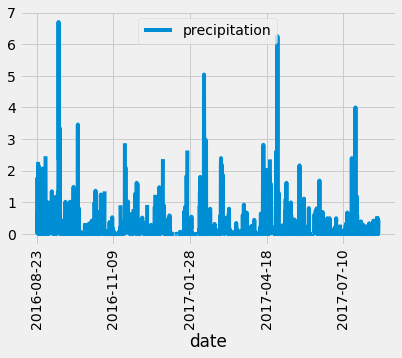

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
# plt.bar(df.date,df.precipitation)
# plt.xticks(rotation='vertical')
df.plot()
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [16]:
# Convert the results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'],)
print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

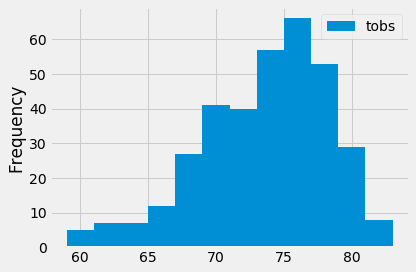

In [17]:
# Plot a histogram of the temperature observations
df.plot.hist(bins=12)

# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot
plt.tight_layout()


SKILL DRILL

Adjust the number of bins in the plot to 5, and then adjust the number to 20. Take note of any differences in the plot caused by changing the number of bins.

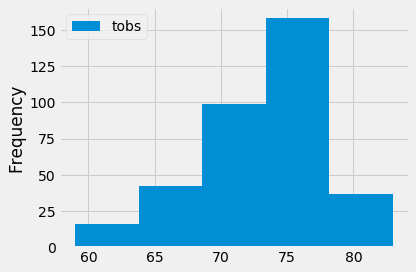

In [18]:
# Adjust the number of bins in the plot to 5
# Plot a histogram of the temperature observations
df.plot.hist(bins=5)

# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot
plt.tight_layout()

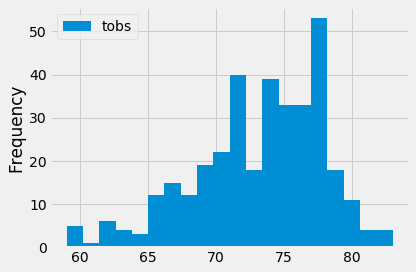

In [19]:
# Adjust the number of bins in the plot to 20
# Plot a histogram of the temperature observations
df.plot.hist(bins=20)

# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot
plt.tight_layout()

In [20]:
# get_date_from_string
# ====================
# This function returns the date object that corresponds to the passed-in date_str and dt_format
# arguments.
#
# Parameters:
# - date_str - the string containing the date value to be processed
# - dt_format - the format to which the date_str is to conform
def get_date_from_string(date_str,dt_format):
    dt_obj = dt.datetime.strptime(date_str,dt_format)
    year,month,day = dt_obj.year,dt_obj.month,dt_obj.day
    return dt.datetime(year,month,day)

In [21]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# calc_temps
# ==========
# This function returns the summary stats, including minimum, average, and maximum values of 
# the temperature column for the data bracketed by start_date and end_date
#
# Arguments:
# - start_date - the date at which to start retrieving the temperature data
# - end_date - the date at which to end retrieving the temperature data
#
# Return:
# A dataframe of the summary calcs for the temperature column values brackets by the specified
# start and end dates

def calc_temps(start_date,end_date):
    # Make sure that the passed arguments are strings. Otherwise, raise an exception
    if type(start_date) != str or type(end_date) != str:
        raise ValueError("Invalid parameter(s)")
    else:
        # get the datetime object from the start_date argument
        start_date = get_date_from_string(start_date,'%Y-%m-%d')
        # get the datetime object from the end_date argument
        end_date = get_date_from_string(end_date,'%Y-%m-%d')
     
        # retrieve the temperature data for the period starting at start_date and ending at end_date
        results = session.query(Measurement.date,Measurement.tobs).\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            order_by(Measurement.date).all()
        
        # Create a dataframe from the results
        df = pd.DataFrame(results,columns=["date","tobs"])
        
        # return the summary stats for the collected temperature data
        return df.describe()
        
calc_temps("2014-12-15","2016-12-18")

,tobs
count,4757.000000
mean,73.922010
std,4.878595
min,56.000000
25%,71.000000
50%,75.000000
75%,78.000000
max,86.000000


# Challenge

In [22]:
# get_month_data
# ==============
# This function returns the precipitation and temperature readings for the month that is specified in m, the passed-in argument.
# 
# Parameters:
# m - the month for which data is required. Can be int (1-12) or str starting with ("jan" - "dec")
#
# Return:
# The data for the request month in a dataframe
#
# Exceptions:
# ValueError - if paramter m is an integer with values other than 1 to 12 or a string which does not start with one of "jan" to 
#              "dec".

def get_month_data(m):
    
    # The months dictionary used to translate string values of month to string numbers "01" to "12"
    months = {  "jan":"01",
                "feb":"02",
                "mar":"03",
                "apr":"04",
                "may":"05",
                "jun":"06",
                "jul":"07",
                "aug":"08",
                "sep":"09",
                "oct":"10",
                "nov":"11",
                "dec":"12"
            }
    
    # If the passed-in paramter, m, is a string, check if the substring composed of its first three letters is  
    # one of the months in the months dictionary
    if (type(m) == str):
        for month in months:
            # if a match is found, return value corresponding to month key eg/ for "jan", return "01"
            if month == m.lower()[0:3]:
                monstr = months[month]
                break
        else:
            # if no match is found, raise an exception
            raise ValueError("Invalid month name")
    # If, however, the parameter is an int,  check if it is between 1 and 12       
    elif (type(m) == int):
        # If m is not between 1 and 12, raise an exception
        if ( m > 12 or m < 1):
            raise ValueError("Invalid month number")
        else:
        # return the corresponding string number, eg/ 1 returns "01"
            monstr = list(months.values())[m-1]
    else:
    # If the parameter is neither a string nor an int, raise an exception
        raise ValueError(f"Invalid argument: {type(m)}. Expecting <str> or <int>.") 

    # return a dataframe composed of four columns: station, date, prcp, and tobs, from the Measurements table
    # filtered for the requested month and sorted by date
    return session.query(Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).\
            filter(Measurement.date.like(f'%-{monstr}-%')).order_by(Measurement.date).all()

In [23]:
# plot
# ====
# This functin plots an overlayed bar graph of the june and december statistical measurements side-by-side
#
# Parameters:
# df - the dataframe containing the values to be plotted
# x_col - the name of the dataframe column for the first bar graph
# x_label - the label to use in the legend for the first bar graph
# y_col - the name of the dataframe column for the second (overlayed) bar graph
# y_label - the label to use in the legend for the second (overlayed) bar graph
# title - the title to use for the bar graph
# bar_width - the width of the plotted bars

def plot(df,x_col,x_legend,y_col,y_legend,y_label,title,bar_width=0.45):
    # Instantion a figure object and an axis object for a plot of size 20 x 10
    fig, ax = plt.subplots(figsize=(20, 10))
    # Instantiate the list of locations for the june bars
    june_locs = [x for x in range(len(df))]
    # Instantiate the lost of locations for the dec bars (0.45" to the right of the corresponding june bars)
    dec_locs = [(x+bar_width) for x in june_locs]
    # Instantiate the locations of the bar (measure) labels 
    xtick_locs = [(x+bar_width/2) for x in june_locs]
    # Plot the bar graph for the june measurements
    june = ax.bar(june_locs, df[x_col],label=x_legend,width=bar_width)
    # Overlay the bar graph for the december measurements
    dec = ax.bar(dec_locs, df[y_col], label=y_legend,width=bar_width)
    # Add the measure labels at the locations specified by xtick_locs
    plt.xticks(xtick_locs, df.measure)
    # Display the legend
    ax.legend()
    # Display the title
    plt.title(title)
    # Display the label of the x-axis
    plt.xlabel("stat measure")
    # Display the label of the y-axis
    plt.ylabel(y_label)
    # Save a copy of the graph to the project folder
    plt.savefig(f"{title}.png")
    plt.show()

In [24]:
# transform_df
# ===========
# This function reconfigures the passed in dataframe in order to facilitate the plotting of spaced-out bar graphs. 
# The changes are as follows:
# - the current index is reset
# - the non-numeric 'index' column is renamed to new_name
# - a numerical column, 'id', is added to the dataframe
# - the 'id' column is set to the index of the passed in dataframe

def transform_df(df,new_name):
    # Reset the current index
    df.reset_index(inplace=True)
    # Rename the 'index' column with the parameter 'new_name'
    df.rename(columns={"index":new_name},inplace=True)
    # get list of the values in the 'index' column
    lst = list(df.index)
    # create a list of integers the same length as the 'index' column
    ind_col = [x for x in range(len(lst))]
    # create a new column,'id', in the passed in dataframe
    df["id"] = ind_col
    # set the index of the passed in dataframe to the new 'id' column
    df.set_index("id",inplace=True)

In [25]:
# Determine key statistical data about the month of June. 
june_data = get_month_data("june")

# create dataframe june_df composed of the june precipitation and temperature measures 
june_df = pd.DataFrame(june_data)

# capture the statistical information for the june data in the june_desc dataframe
june_desc = june_df.describe()

In [26]:
# Determine key statistical data about the month of December.
dec_data = get_month_data("december")

# create dataframe dec_df composed of the december precipitation and temperature measures 
dec_df = pd.DataFrame(dec_data)

# capture the statistical information for the december data in the dec_desc dataframe
dec_desc = dec_df.describe()

In [27]:
# Precipitation
# Create the jun_dec_prcp dataframe, composed on two columns, june_prcp, the june precipitation stats, and dec_prcp, the 
# december precipitation stats

jun_dec_prcp = pd.DataFrame({"june_prcp":june_desc['prcp'],"dec_prcp":dec_desc['prcp']})

In [28]:
# Call transform_df on the jun_dec_prcp, with the string argument, 'measure', to ranem the current index column, and create
# a numeric index, 'id', to use when plotting the bar graphs
transform_df(jun_dec_prcp,"measure")
jun_dec_prcp

,measure,june_prcp,dec_prcp
id,,,
0,count,1574.000000,1405.000000
1,mean,0.136360,0.216819
2,std,0.335731,0.541399
3,min,0.000000,0.000000
4,25%,0.000000,0.000000
5,50%,0.020000,0.030000
6,75%,0.120000,0.150000
7,max,4.430000,6.420000


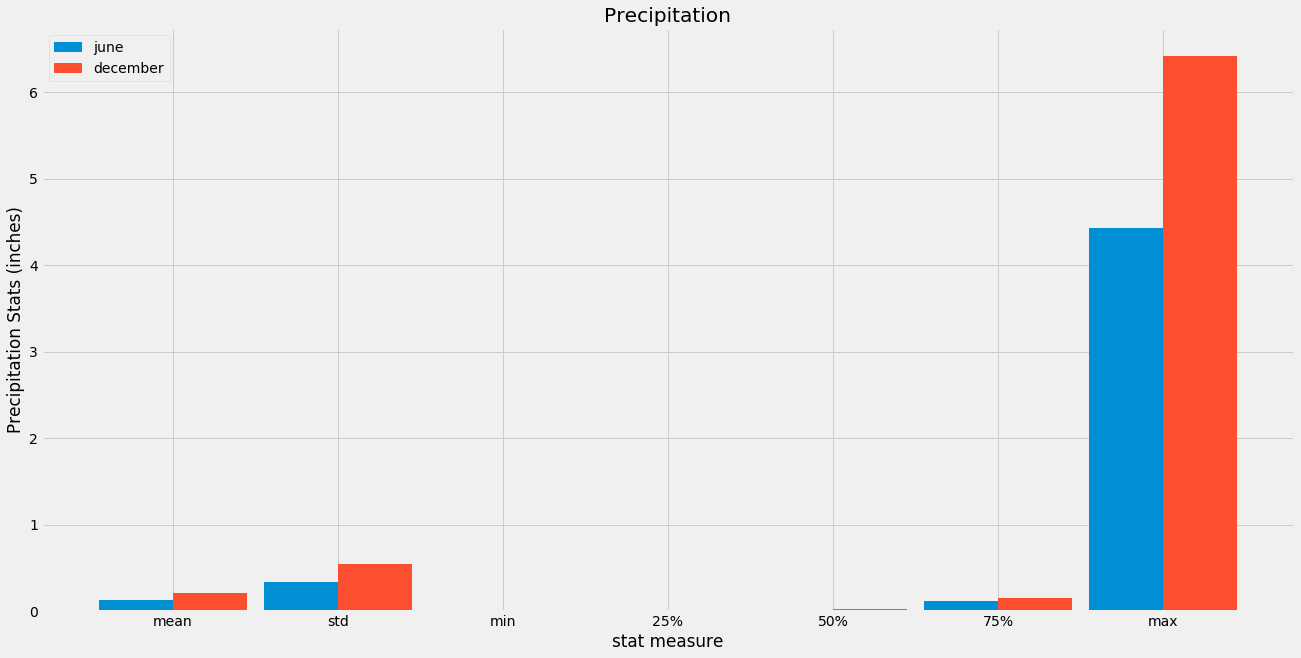

In [29]:
# Plot the precipitation stats bar graph
plot(df=jun_dec_prcp[jun_dec_prcp["measure"]!="count"],x_col="june_prcp",x_legend="june",y_col="dec_prcp",
     y_legend="december",y_label="Precipitation Stats (inches)",title="Precipitation")

In [30]:
# Temperature
# Create the jun_dec_tobs dataframe, composed on two columns, june_tobs, the june temperature stats, and dec_tobs, the 
# december temperature stats
jun_dec_tobs = pd.DataFrame({"june_tobs":june_desc['tobs'],"dec_tobs":dec_desc['tobs']})

In [31]:
# Call transform_df on the jun_dec_tobs, with the string argument, 'measure', to ranem the current index column, and create
# a numeric index, 'id', to use when plotting the bar graphs
transform_df(jun_dec_tobs,"measure")
jun_dec_tobs

,measure,june_tobs,dec_tobs
id,,,
0,count,1700.000000,1517.000000
1,mean,74.944118,71.041529
2,std,3.257417,3.745920
3,min,64.000000,56.000000
4,25%,73.000000,69.000000
5,50%,75.000000,71.000000
6,75%,77.000000,74.000000
7,max,85.000000,83.000000


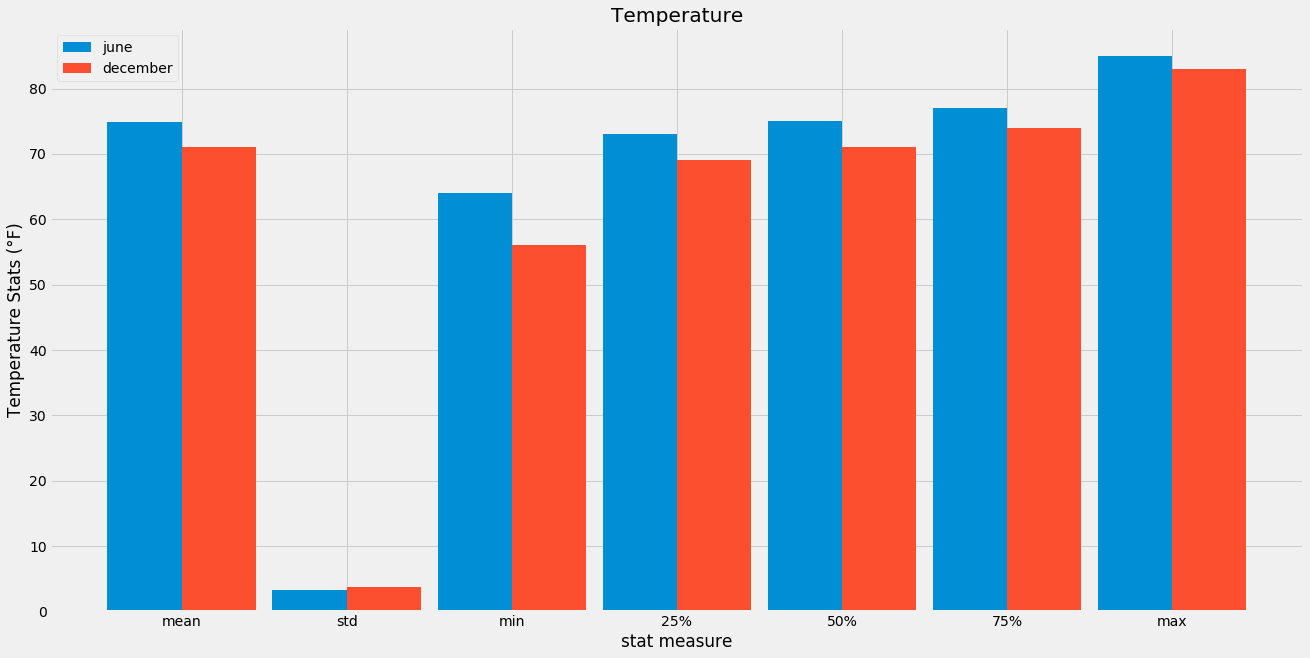

In [32]:
# Plot the temperature stats bar graph
plot(jun_dec_tobs[jun_dec_tobs["measure"]!="count"],x_col="june_tobs",x_legend="june",
     y_col="dec_tobs",y_legend="december",y_label="Temperature Stats (°F)",title="Temperature")